<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

# The BNDiscretizer Class

Most of the functionality of pyAgrum works only on discrete data. However data in the real world can be often continous. This class can be used to create dizcretized variables from continous data. Since this class was made for the purposes of the class BNClassifier, this class accepts data in the form of ndarrays. To transform data from a csv file to an ndarray we can use the function in BNClassifier XYfromCSV. 

# Creation of an instance and setting parameters

To create an instance of this class we need to specify the default parameters (the discretization method and the number of bins) for discretizing data. We create a discretizer which uses the EWD (Equal Width Discretization) method with 5 bins. The threshold is used for determining if a variable is already discretized. In this case, if a variable has more than 10 unique values we treat it as continous. we can use the setDiscretizationParameters method to set the discretization parameters for a specific variable

In [1]:
import pyAgrum.skbn as skbn

discretizer=skbn.BNDiscretizer(defaultDiscretizationMethod='uniform',defaultNumberOfBins=5,discretizationThreshold=10)

discretizer.setDiscretizationParameters('var4','quantile',10)
discretizer.setDiscretizationParameters('var5','NoDiscretization',None)


# Auditing data

To see how certain data will be treated by the discretizer we can use the audit method.

In [2]:
import pandas
X = pandas.DataFrame.from_dict({
  'var1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3],
  'var2': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n'],
  'var3': [1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2, 5, 1, 2],
  'var4': [1.11, 2.213, 3.33, 4.23, 5.42, 6.6, 7.5, 8.9, 9.19, 10.11, 11.12, 12.21, 13.3, 14.5],
  'var5': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1]
})

print(X)

auditDict=discretizer.audit(X)

print()
print("** audit **")
for var in auditDict:
    print(f"- {var} : ")
    for k,v in auditDict[var].items():
        print(f"    + {k} : {v}")

    var1 var2  var3    var4  var5
0      1    a     1   1.110     1
1      2    b     2   2.213     2
2      3    c     5   3.330     3
3      4    d     1   4.230     4
4      5    e     2   5.420     5
5      6    f     5   6.600     6
6      7    g     1   7.500     7
7      8    h     2   8.900     8
8      9    i     5   9.190     9
9     10    j     1  10.110    10
10    11    k     2  11.120    11
11     1    l     5  12.210    12
12     2    m     1  13.300    13
13     3    n     2  14.500     1

** audit **
- var1 : 
    + k : 5
    + methode : uniform
    + type : Continuous
- var2 : 
    + methode : NoDiscretization
    + k : 14
    + type : Discrete
- var3 : 
    + methode : NoDiscretization
    + k : 3
    + type : Discrete
- var4 : 
    + k : 10
    + methode : quantile
    + type : Continuous
- var5 : 
    + k : None
    + methode : NoDiscretization
    + type : Discrete


We can see that even though var2 has more unique values than var1 it is treated as a discrete variable. This is because the values of var2 are strings and therefore cannot be discretized.

# Creating variables from data

To create variables from data we can use the createVariable method for each column in our data matrix. This will use the parameters that we have already set to create discrete (or discretized) variables from our data.

In [3]:
var1=discretizer.createVariable('var1',X['var1'])
var2=discretizer.createVariable('var2',X['var2'])
var3=discretizer.createVariable('var3',X['var3'])
var4=discretizer.createVariable('var4',X['var4'])
var5=discretizer.createVariable('var5',X['var5'])

print(var1)
print(var2)
print(var3)
print(var4)
print(var5)

var1:Discretized(<(1;3[,[3;5[,[5;7[,[7;9[,[9;11)>)
var2:Labelized({a|b|c|d|e|f|g|h|i|j|k|l|m|n})
var3:Integer({1|2|5})
var4:Discretized(<(1.11;2.5481[,[2.5481;3.87[,[3.87;5.301[,[5.301;6.78[,[6.78;8.2[,[8.2;9.132[,[9.132;10.211[,[10.211;11.556[,[11.556;12.973[,[12.973;14.5)>)
var5:Range([1,13])


For supervised discretization algorithms (MDLP and CAIM) the list of class labels for each datapoint is also needed.


In [4]:
y=[True,False,False,True,False,False,True,True,False,False,True,True,False,True]

discretizer.setDiscretizationParameters('var4','CAIM')
var4=discretizer.createVariable('var4',X['var4'],y)
print(var4)
discretizer.setDiscretizationParameters('var4','MDLP')
var4=discretizer.createVariable('var4',X['var4'],y)
print(var4)


var4:Discretized(<(1.11;10.615[,[10.615;14.5)>)
var4:Discretized(<(1.11;1.6615[,[1.6615;14.5)>)


The discretizer keeps track of the number of discretized variables created by it and the number of bins used to discretize them. To reset these two numbers to 0 we can use the clear method. We can also use it to clear the specific parameteres we have set for each variable.

In [5]:
print(f"numberOfContinuous : {discretizer.numberOfContinous}")
print(f"totalNumberOfBins : {discretizer.totalNumberOfBins}")

discretizer.clear()
print("\n")

print(f"numberOfContinuous : {discretizer.numberOfContinous}")
print(f"totalNumberOfBins : {discretizer.totalNumberOfBins}")

discretizer.audit(X)

numberOfContinuous : 4
totalNumberOfBins : 19


numberOfContinuous : 0
totalNumberOfBins : 0


{'var1': {'k': 5, 'methode': 'uniform', 'type': 'Continuous'},
 'var2': {'methode': 'NoDiscretization', 'k': 14, 'type': 'Discrete'},
 'var3': {'methode': 'NoDiscretization', 'k': 3, 'type': 'Discrete'},
 'var4': {'k': 10, 'methode': 'MDLP', 'type': 'Continuous'},
 'var5': {'k': None, 'methode': 'NoDiscretization', 'type': 'Discrete'}}

In [6]:
discretizer.clear(True)
discretizer.audit(X)

{'var1': {'k': 5, 'methode': 'uniform', 'type': 'Continuous'},
 'var2': {'methode': 'NoDiscretization', 'k': 14, 'type': 'Discrete'},
 'var3': {'methode': 'NoDiscretization', 'k': 3, 'type': 'Discrete'},
 'var4': {'k': 5, 'methode': 'uniform', 'type': 'Continuous'},
 'var5': {'k': 5, 'methode': 'uniform', 'type': 'Continuous'}}

# Using Discretizer with BNLearner

In [7]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

import pyAgrum.skbn as skbn
import pandas as pd

file_name = 'res/discretizable.csv'
data = pd.read_csv(file_name)

discretizer = skbn.BNDiscretizer(defaultDiscretizationMethod='uniform',
                                 defaultNumberOfBins=5,
                                 discretizationThreshold=25)

In [8]:
template = gum.BayesNet()
for name in data:
    template.add(discretizer.createVariable(name, data[name]))

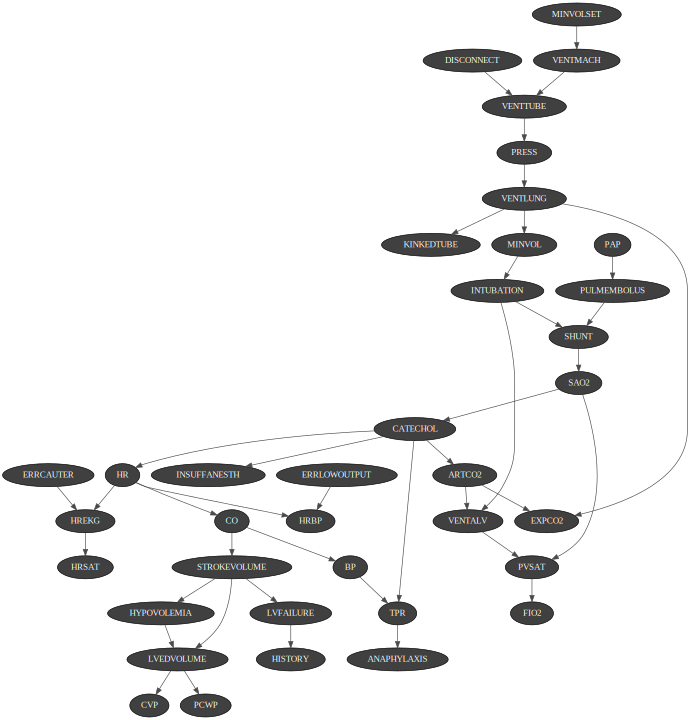

In [9]:
learner = gum.BNLearner(file_name, template)
learner.useMIIC()
learner.useNMLCorrection()

bn = learner.learnBN()
gnb.show(bn,size="10!")